In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [51]:
# Load the 'mpg' dataset from seaborn
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Preprocessing

In [52]:
df.drop(columns=['name'],inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [53]:
df["model_year"] = df["model_year"] + 1900
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


In [54]:
import datetime
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['model_year']
df.drop(columns=['model_year'],inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_age
0,18.0,8,307.0,130.0,3504,12.0,usa,56
1,15.0,8,350.0,165.0,3693,11.5,usa,56
2,18.0,8,318.0,150.0,3436,11.0,usa,56
3,16.0,8,304.0,150.0,3433,12.0,usa,56
4,17.0,8,302.0,140.0,3449,10.5,usa,56


In [55]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    object 
 7   car_age       398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    object 
 7   car_age       398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [67]:
df[df["horsepower"].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_age
32,25.0,4,98.0,NaN,2046,19.0,usa,55
126,21.0,6,200.0,NaN,2875,17.0,usa,52
330,40.9,4,85.0,NaN,1835,17.3,europe,46
336,23.6,4,140.0,NaN,2905,14.3,usa,46
354,34.5,4,100.0,NaN,2320,15.8,europe,45
374,23.0,4,151.0,NaN,3035,20.5,usa,44


In [68]:
df["horsepower"].fillna(df["horsepower"].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    object 
 7   car_age       398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [69]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_age
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,49.989950
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,44.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,47.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,50.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,53.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,56.000000


# Univariate Analysis

In [71]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

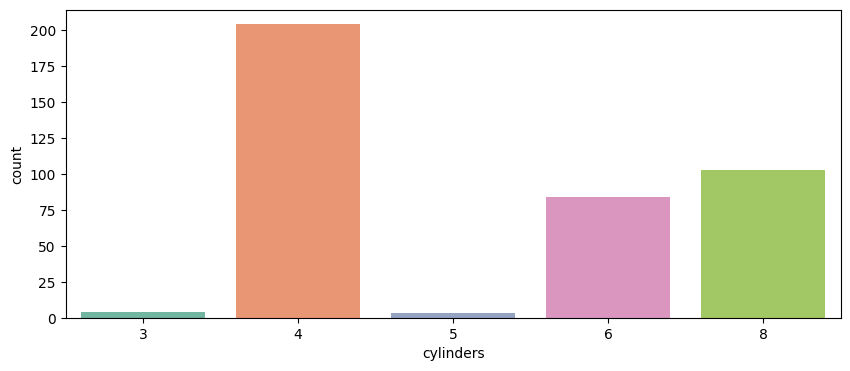

In [83]:
plot.figure(figsize=(10,4))
sns.countplot(data=df,x='cylinders', palette='Set2')
plot.show()

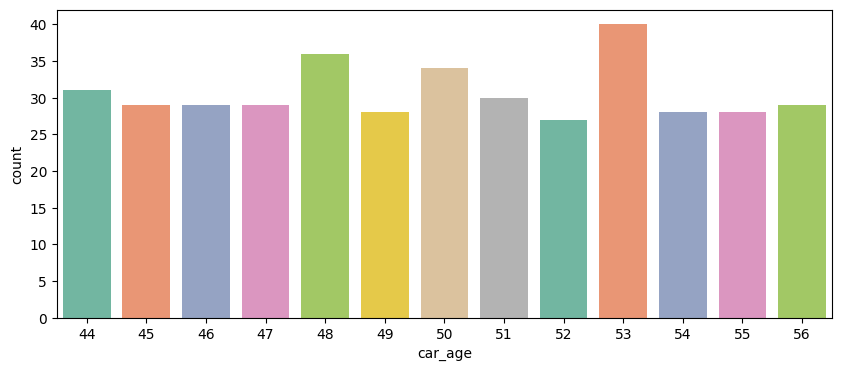

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_age
0,18.0,8,307.0,130.0,3504,12.0,usa,56
1,15.0,8,350.0,165.0,3693,11.5,usa,56
2,18.0,8,318.0,150.0,3436,11.0,usa,56
3,16.0,8,304.0,150.0,3433,12.0,usa,56
4,17.0,8,302.0,140.0,3449,10.5,usa,56


In [94]:
plot.figure(figsize=(10,4))
sns.countplot(data=df,x='car_age' , palette='Set2')
plot.show()
df.head()

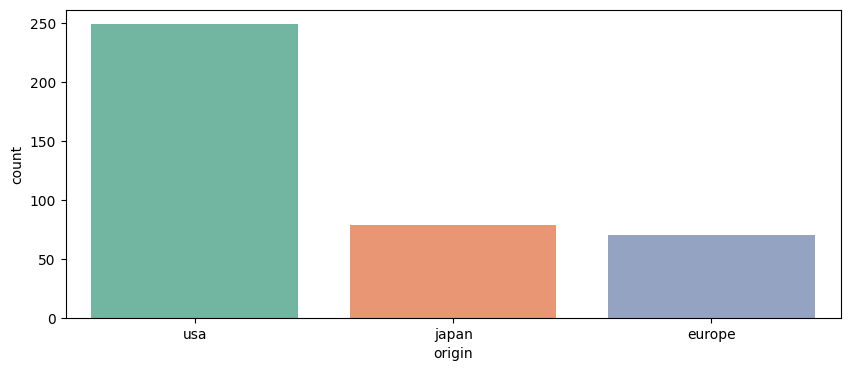

In [17]:
plot.figure(figsize=(10,4))
sns.countplot(data=df,x='origin' , palette='Set2')
plot.show()

<Figure size 1000x400 with 0 Axes>

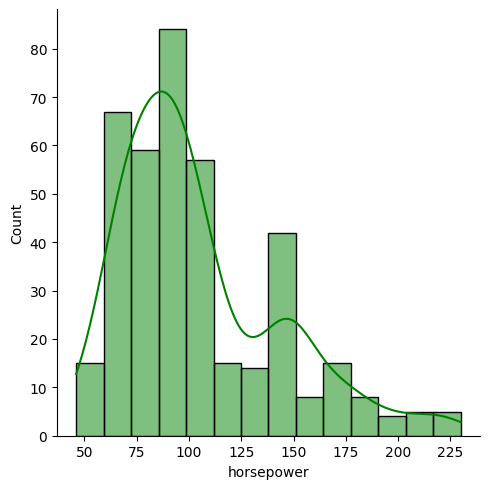

In [18]:
plot.figure(figsize=(10,4))
sns.displot(data=df,x='horsepower' , kde=True, color='green')
plot.show()

<Figure size 1000x400 with 0 Axes>

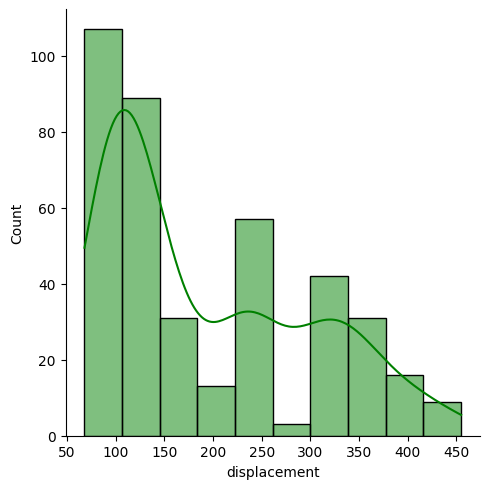

In [19]:
plot.figure(figsize=(10,4))
sns.displot(data=df,x='displacement' , kde=True, color='green')
plot.show()

In [20]:
# bivariate Analysis

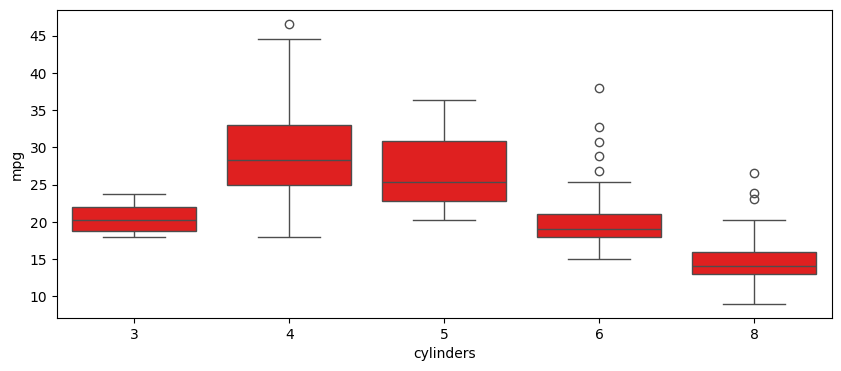

In [21]:
plot.figure(figsize=(10,4))
sns.boxplot(data=df,x='cylinders',y='mpg',color='red')
plot.show()

<Axes: xlabel='car_age', ylabel='mpg'>

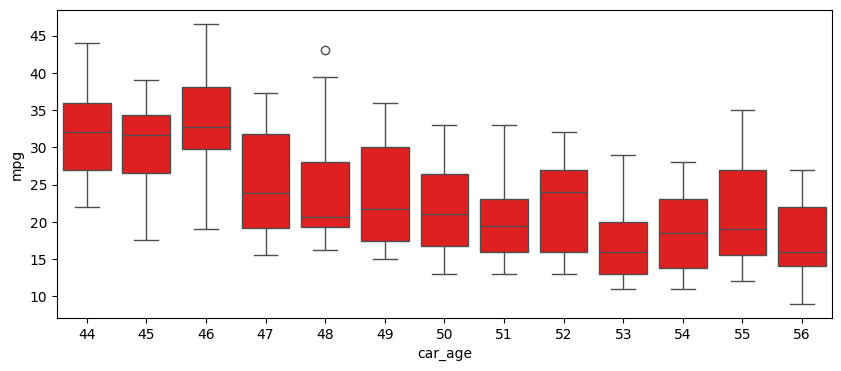

In [22]:
plot.figure(figsize=(10,4))
sns.boxplot(data=df,x='car_age',y='mpg',color='red')

In [23]:
#multivariate Analysis

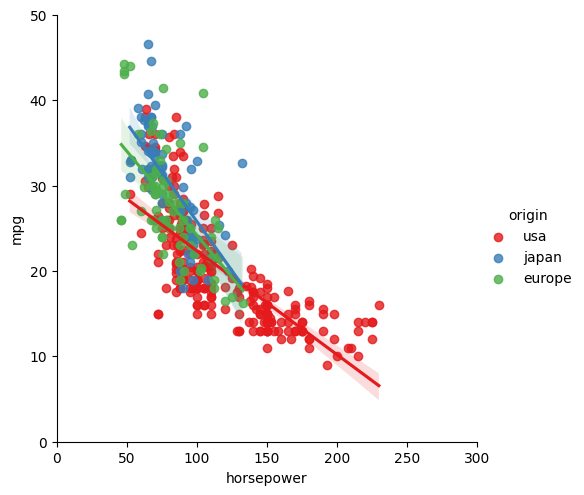

<Figure size 1500x400 with 0 Axes>

In [24]:
graph= sns.lmplot(data=df,x='horsepower',y='mpg',hue='origin',palette='Set1')
graph.set(xlim=(0,300), ylim=(0,50))
plot.figure(figsize=(15,4))
plot.show()

In [25]:
df=pd.get_dummies(df,columns=['origin'],drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_age,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,56,False,True
1,15.0,8,350.0,165.0,3693,11.5,56,False,True
2,18.0,8,318.0,150.0,3436,11.0,56,False,True
3,16.0,8,304.0,150.0,3433,12.0,56,False,True
4,17.0,8,302.0,140.0,3449,10.5,56,False,True


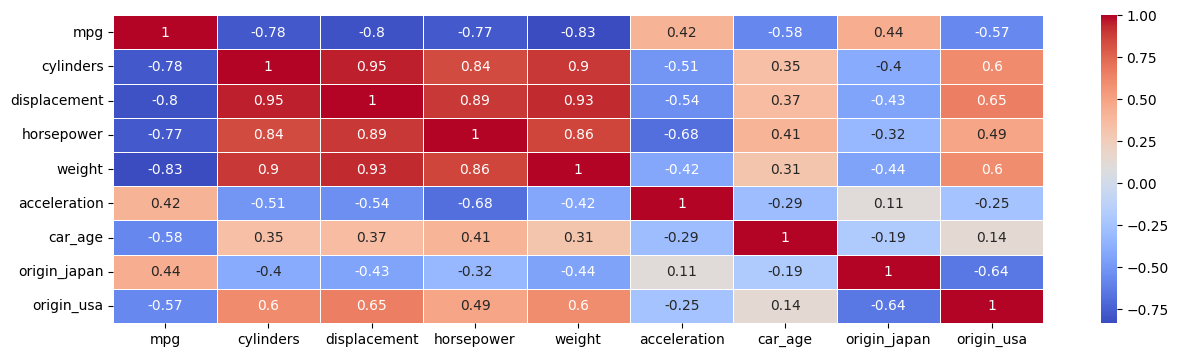

In [26]:
plot.figure(figsize=(15,4))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='coolwarm')
plot.show()

In [27]:
df.drop(["displacement", "acceleration"], axis=1, inplace=True)
df.head()

,mpg,cylinders,horsepower,weight,car_age,origin_japan,origin_usa
0,18.0,8,130.0,3504,56,False,True
1,15.0,8,165.0,3693,56,False,True
2,18.0,8,150.0,3436,56,False,True
3,16.0,8,150.0,3433,56,False,True
4,17.0,8,140.0,3449,56,False,True


In [ ]:
# model building

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2430493455.py, line 1)

In [97]:
x = df.drop("mpg", axis=1)
y = df["mpg"]

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42)


In [98]:
x_test.sample(10)


,cylinders,horsepower,weight,car_age,origin_japan,origin_usa
341,6,110.0,2725,45,False,True
351,4,65.0,2045,45,False,True
75,8,150.0,4077,54,False,True
90,8,198.0,4952,53,False,True
371,4,84.0,2525,44,False,True
158,8,150.0,4498,51,False,True
70,8,190.0,4422,54,False,True
246,4,52.0,1985,48,True,False
275,6,125.0,3140,48,False,False
294,4,65.0,1975,47,True,False


In [32]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

In [33]:
l_model = lr()
l_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
l_model.intercept_

np.float64(82.85065826934634)

In [35]:
coefficients = pd.DataFrame(l_model.coef_, x.columns, columns=['Coefficient'])
coefficients

,Coefficient
cylinders,0.324113
horsepower,-0.009844
weight,-0.006049
car_age,-0.807123
origin_japan,-0.083054
origin_usa,-2.767548


In [36]:
y_pred = l_model.predict(x_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.sample(10)

,Actual,Predicted
39,14.0,9.557902
389,22.0,28.262352
347,37.0,35.156480
16,18.0,19.093537
272,23.8,24.530443
73,13.0,13.022018
108,20.0,26.634124
350,34.7,31.039869
341,23.5,28.140329
181,33.0,31.520726


In [37]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R^2 Score: {r2}')
evaluation(y_test, y_pred)

Mean Absolute Error: 2.4184180456433637
Mean Squared Error: 9.669846592167575
Root Mean Squared Error: 3.109637694678847
R^2 Score: 0.8315104235736819
